# Distributions cheat sheet

With Covid-19 sweeping the planet, there has been a surge of people contributing their ideas to understanding, analysing, and even modelling the spread of the virus. It's been amazing to see so many data scientists getting together across the globe to share their thoughts on where things are heading.

In this post, I wanted to provide a primer / cheat-sheet on probability distributions to equip the community with a toolkit to understanding Covid-19. Of course, this can also be a point of reference for any other data science / statistical modelling activities!

If you have...
* 30 seconds: a table of distributions and some use cases are shown below.
* 2 minutes:
    * Random variables can be discrete or continuous. 
    * **Probability mass functions** are used to explain discrete random variables; examples include the poisson distribution, binomial distribution, and the hypergeometric distribution. 
    * **Probability density functions** are used to explain continuous random variables; examples include the uniform distribution, the normal distribution, and the beta distribution.
* 7 minutes: go on.

## Distributions of discrete variables

We're going to draw 1000 samples from the following distributions.

| Name | Used to... | Example use case | Parameters | 
| ---- | ---------------- | ------ | ---------- |
| Binomial | Represent _number of successes_ of $n$ trials | How many heads will I get from $n$ tosses? | $p$: probability of "success" / heads; $n$: number of trials | 
| Geometric | Represent _number of trials_ until first success | How many tails will I see until the first head? | $p$: probability of success |  
| Negative binomial | Represent _number of failures_ before we see $n$ successful binary events | How many tails will I see before I see $n$ heads? | $p$ probability of success/failure; $n$: number of successes |
| Poisson | Represent _number of successes_ of binary events of infinite trials  | How many red buses will I see at my bus stop? | $\lambda$: rate of success | 
| Hypergeometric | Represent _number of successes_ when drawing a sample of $n$ objects without replacement | How many red balls will I draw from a bag with 10 red balls and 90 blue balls if I sample 20? | $K$: total number of "successful" cases; $n$: sample size; $N$: total number of objects | 

![dist](discrete_distributions.png)

## Distributions of continuous variables

We're going to draw 1000 samples from the following distributions.

| Name | Used to... | Example use case | Parameters | 
| ---- | ---------------- | ------ | ---------- |
| Uniform | Represent a random variable whose value occurs between $a$ and $b$ | The hyper-parameter of a model can be anything between $a$ and $b$; random number generation | $a$: minimum value of the random variable; $b$: maximum value of the random variable | 
| Beta |  Represent the distribution of a random variable whose value is between 0 and 1 | Estimating the probability of an event | $\alpha$ and $\beta$ are shape parameters. When $\alpha = \beta = 1$, this is the uniform distribution where $a = 0$ and $b = 1$. |
| Exponential | Represent a random variable that decays exponentially | How long do I have to wait until the first success? | $\lambda$: rate parameter |
| Gamma | Represent a random variable that decays exponentially | How long do I have to wait until the $n$th success? | $k$: shape parameter; $\theta$: scale parameter; OR $\alpha$: shape parameter (same as $k$); $\beta$: rate parameter where $\beta = 1/\theta$  |
| Normal | Represent the behaviour of most continuous random variables (e.g. height, scores) | Represent quantities that follow a "bell curve" | $\mu$: average, $\sigma$: standard deviation | 
| von Mises distribution | Represent angular variables on a circle | Sampling torsion angles | $\mu$: central location; $\kappa$: dispersion |
| t-distribution | As above, but allowing more extreme values to occur | As above, but catering for small sample sizes; t-tests. | $d$: degrees of freedom |
| Chi-squared distribution | Represents the sum of the squares of $k$ normally-distributed random variables | Used for the a "goodness of fit" test or independence of categorical variables | $d$: degrees of freedom |
| Dirichlet distribution | Represent the probability distribution space of $K$ events | If an event has $K$ possibilities, what would be its possible probability distributions? | $\alpha$: a $K$-sized vector of numbers |

![dist](continuous_distributions.png)

## Definitions

Let's start by defining what a _random variable_ is...
> A random variable is a real-valued function that maps probability events to measurable values.

Random variables are also considered to either be **discrete** or **continuous**. We'll first start with the discrete case.

### Discrete random variables and probability mass functions

The definition of a random variable can sound a bit vague; the oft-quoted "coin toss" provides a good way to understand random variables.
* The "event space" is whether a coin is heads or tails. A sequence of heads/tails is thus the sequence of events.
* Thus, a "random variable" can be used to express the _number of heads_ in that sequence.

These types of random variables are known as _discrete_ random variables. Other examples include:
* The sum of two dice that are rolled
* The number of objects drawn from a bag
* The number of days elapsed between visits to the grocery store

As a rule of thumb, if you can count it / it's an integer, it's likely to be discrete.

Since discrete random variables can only take on a limited set of values, it is thus possible to calculate the probability space of that random variable. 
> Consider a traditional six-sided die. We know that there are six **and only six possible faces**, so we can calculate the probability of landing on one of those six faces.

Thus, the probability of the discrete random variable $X$ taking some value $x$, $Pr(X = x)$, can be calculated by a **probability mass function** (PMF). Different types of discrete random variables have different PMFs. We can also visualise the probability space of PMFs using histograms.

In [1]:
# Import stuff
import numpy as np
import scipy.stats as sp
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("ticks")
sns.set_context("paper")

In [2]:
# Let's generate some random numbers
np.random.seed(42)

# 100 tosses; 20% chance of success. Do 1000 such trials.
binomial = sp.binom.rvs(n = 100, p = 0.2, size = 1000)
binomial_bins = np.arange(10, 41, 5)

# How many trials will we need until we see the first success? 20% chance of success. Run this 1000 times.
geometric = sp.geom.rvs(p=0.2, size = 1000)
geometric_bins = np.arange(0, 31, 5)

# How many failures will we see before the 10th success? Success rate of 40%. Run this experiment 1000 times.
nbinomial = sp.nbinom.rvs(n = 10, p = 0.4, size = 1000)
nbinomial_bins = np.arange(0, 11, 1)

# How many red buses will we see over 1000 days if they come at a rate of 0.4?
# rate (mu) = n x p where n is infinite trials, and p is the probability of success.
poisson = sp.poisson.rvs(mu = 0.4, size = 1000)
poisson_bins = np.arange(0, 6, 1)

# 10 red balls in a bag of 100. If I sample 20, how many red balls will I get? Run this experiment 1000 times.
# Scipy's notation is a bit confusing
hypergeometric = sp.hypergeom.rvs(M = 100, n = 10, N = 20, size = 1000)
hypergeometric_bins = np.arange(0, 11, 1)


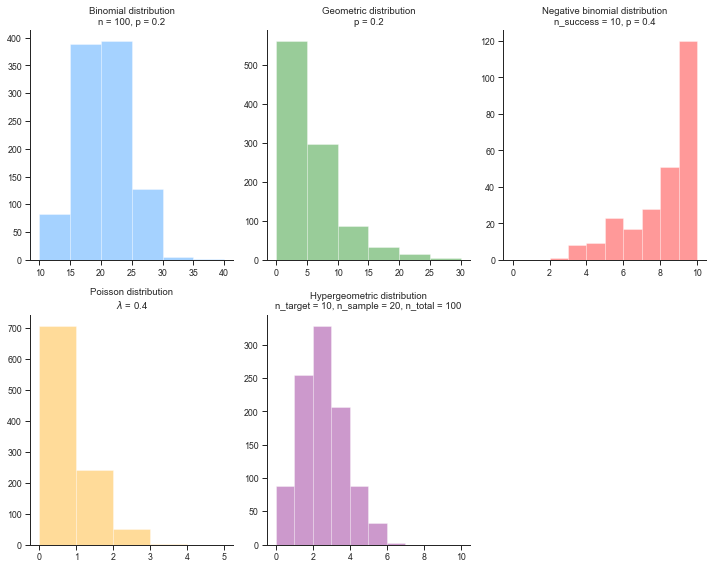

In [3]:
fig, axes = plt.subplots(2,3)
ax = axes.flatten()

distributions = [
    ("Binomial", binomial, binomial_bins, 'dodgerblue', 'n = 100, p = 0.2'),
    ("Geometric", geometric, geometric_bins, 'g', 'p = 0.2'), 
    ("Negative binomial", nbinomial, nbinomial_bins, 'r', 'n_success = 10, p = 0.4'), 
    ("Poisson", poisson, poisson_bins, 'orange', '$\lambda$ = 0.4'), 
    ("Hypergeometric", hypergeometric, hypergeometric_bins, 'purple', 'n_target = 10, n_sample = 20, n_total = 100')
]

for i,v in enumerate(distributions):
    name, the_dist, the_dist_bins, c, params = v
    sns.distplot(the_dist, ax = ax[i], kde = False, color = c, bins = the_dist_bins)
    ax[i].set_title(f"{name} distribution\n{params}")

plt.subplots_adjust(hspace = 0.5)
sns.despine()
fig.delaxes(ax[i+1])

fig.set_size_inches((10,8))

plt.tight_layout()
plt.savefig("discrete_distributions.png", dpi = 300)

### Continuous random variables and probability distribution functions

Well, what about random variables that are not countable / integers? Such as...
* The height of individuals
* Time elapsed between events (remember, you can have miliseconds, microseconds...)
* Batting averages of baseball players

As a rule of thumb, if a random variable can take a decimal value, it's likely to be continuous.

Unlike discrete random variables, we cannot calculate the probability that $X$ is going to an _exact_ value $x$. This is because we cannot enumerate all the possible values of the random variable.
> Think about in practice: what is the probability that the temperature tomorrow will be _precisely_ 23.000000 degrees Celsius (73.400000F for Americans)? Another example, what is the probability that someone will be _precisely_ 174.714 centimeters tall (5'8)? 

Since a continuous random variable, by definition, is uncountable, we account for them using **probability distribution functions** (PDFs). While they might sound similar to PMFs, PDFs _do not_ represent probabilities, but probability _densities_.
> Another way of thinking about the density is that the density represents a form of relative likelihood. The higher the density, the more likely that the random variable takes on that particular value.

For PDFs, since the probability of an exact value is 0, we typically calculate it in intervals; e.g. the probability that $X$ is _less than or equal to_ $x$; $Pr(X \leq x)$. This can also be visualised as an integral of a function.

In [4]:
# Let's generate some random numbers
np.random.seed(42)

# Uniform distribution between 0,1 
uniform = sp.uniform.rvs(0, 1 ,size=1000)
uniform_bins = np.arange(0, 1.01, 0.01)

# Beta distribution but with four different cases; a = b = 1; a > b; b > a; a < 1, b < 1, a = b; 
beta_1 = sp.beta.rvs(a = 1, b = 1, size = 1000)
beta_2 = sp.beta.rvs(a = 5, b = 1, size = 1000)
beta_3 = sp.beta.rvs(a = 1, b = 5, size = 1000)
beta_4 = sp.beta.rvs(a = 0.5, b = 0.5, size = 1000)
beta_bins = uniform_bins.copy() # Still between 0 and 1

# How much time will elapse until the first success? Play with different scale values
expon_1 = sp.expon.rvs(scale = 1, size = 1000)
expon_2 = sp.expon.rvs(scale = 0.5, size = 1000)
expon_3 = sp.expon.rvs(scale = 4, size = 1000)
expon_bins = np.arange(0, 10.1, 0.01)

# How much time until the ath event? Plot different cases; three scale values, two k values
gamma_1 = sp.gamma.rvs(a = 1, scale = 1, size = 1000)
gamma_2 = sp.gamma.rvs(a = 1, scale = 0.5, size = 1000)
gamma_3 = sp.gamma.rvs(a = 1, scale = 4, size = 1000)

gamma_4 = sp.gamma.rvs(a = 3, scale = 1, size = 1000)
gamma_5 = sp.gamma.rvs(a = 3, scale = 0.5, size = 1000)
gamma_6 = sp.gamma.rvs(a = 3, scale = 4, size = 1000)
gamma_bins = expon_bins.copy()

# Plot the good old' standard normal distribution, which is king!
normal = sp.norm.rvs(size=1000)
normal_bins = np.arange(-3, 3.01, 0.01)

# Plot the circular normal, or von mises, distribution
vm = sp.vonmises.rvs(kappa = 1, size=1000)
vm_bins = np.arange(-np.pi, np.pi+0.01, 0.1)

# t-distribution and chi-squared distributions with 5 degrees of freedom
t = sp.t.rvs(df=5, size = 1000)
t_bins = normal_bins.copy()

chi = sp.chi2.rvs(df = 5, size = 1000)
chi_bins = np.arange(0, int(max(chi))+1, 1)

# Dirichlet distribution for 3-event space with concentration parameters of 1,1,1
dirichet = sp.dirichlet.rvs([1,1,1], size = 1000)

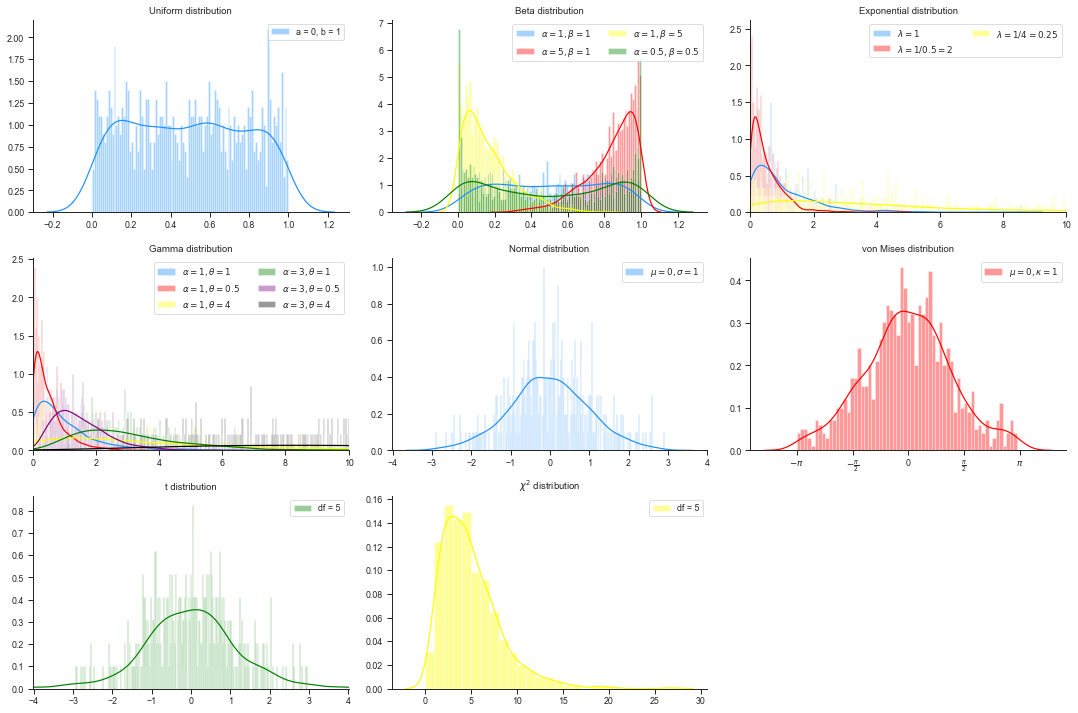

In [5]:
distributions = [
    ("Uniform", [uniform], uniform_bins, ['dodgerblue'], ['a = 0, b = 1']),
    ("Beta", [beta_1, beta_2, beta_3, beta_4], beta_bins, 
             ['dodgerblue', 'red', 'yellow', 'green'], 
             ['$\\alpha = 1, \\beta = 1$', '$\\alpha = 5, \\beta = 1$',
              '$\\alpha = 1, \\beta = 5$', '$\\alpha = 0.5, \\beta = 0.5$']),
    ("Exponential", [expon_1, expon_2, expon_3], expon_bins, 
             ['dodgerblue', 'red', 'yellow'], 
             ['$\lambda = 1$', '$\lambda = 1/0.5 = 2$',
              '$\lambda = 1/4 = 0.25$']),
    ("Gamma", [gamma_1, gamma_2, gamma_3, gamma_4, gamma_5, gamma_6], gamma_bins, 
             ['dodgerblue', 'red', 'yellow', 'green', 'purple', 'black', 'brown'], 
             ['$\\alpha = 1, \\theta = 1$', '$\\alpha = 1, \\theta = 0.5$', '$\\alpha = 1, \\theta = 4$',
              '$\\alpha = 3, \\theta = 1$', '$\\alpha = 3, \\theta = 0.5$', '$\\alpha = 3, \\theta = 4$']),
    
    ("Normal", [normal], normal_bins, ['dodgerblue'], ['$\mu = 0, \sigma = 1$']),
    ("von Mises", [vm], vm_bins, ['red'], ['$\mu = 0, \kappa = 1$']),
    
    ("t", [t], t_bins, ['green'], ['df = 5']),
    ("$\chi^2$", [chi], chi_bins, ['yellow'], ['df = 5']),
]

fig, axes = plt.subplots(3,3)
ax = axes.flatten()

for i,v in enumerate(distributions):
    name, the_dist_list, the_dist_bins, c_list, params_list = v
    
    for dl, c, params in zip(the_dist_list, c_list, params_list):
        sns.distplot(dl, ax = ax[i], kde = True, color = c, label = params, bins = the_dist_bins)
        
    ax[i].set_title(f"{name} distribution")
    ax[i].legend(loc = 'upper right', ncol = 2)
    
# Custom labelling / manip
ax[2].set_xlim((0,10))
ax[3].set_xlim((0,10))

ax[5].set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax[5].set_xticklabels(['$-\pi$', '$-\\frac{\pi}{2}$', '0', '$\\frac{\pi}{2}$', '$\pi$'])
ax[6].set_xlim(ax[4].get_xlim())
    
plt.subplots_adjust(hspace = 0.5)
sns.despine()

# plotting a Dirichlet distribution is not straight forward when K > 2
fig.delaxes(ax[8])
fig.set_size_inches((15,10))

plt.tight_layout()
plt.savefig("continuous_distributions.png", dpi = 300)